In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib notebook 

In [2]:
# Generate filenames
datasetDirectory = "../Data/"
categories = ["bentArm", "straightArm"]

def generate_filenames(rootPath, directoryList, versionCount):
    out = []
    codingDepth = 2
    coding = range(1, codingDepth + 1)
    for d in directoryList:
        for i in coding:
            for j in coding:
                for k in coding:
                    for v in range(1, versionCount + 1):
                        filename = "{}_{}_{}_v{}.csv".format(i, j, k, v)
                        out.append(rootPath + d + "/" + filename)
    return out

filepaths = generate_filenames(datasetDirectory, categories, 2)

In [3]:
# Fix data files:
def fix(path):
    fixedLines = []
    values = None
    out = ["myo,action"]
    with open(path) as f:
        lines = f.readlines()
        for i, line in enumerate(lines):
            if i == 1400:
                continue
            if i == 1401:
                values = line.split(',')
                continue
            val = line.split('\"')[-1:][0].strip()
#             print(val)
            fixedLines.append(val)
    assert(len(fixedLines) == len(values) or values is None or fixedLines is None)
#     print(fixedLines)
#     print(values)
    for i in range(len(fixedLines)):
            out.append(fixedLines[i] + "," + values[i])
    return out

def writeout(path, lines):
    with open(path, "w") as f:
        for i in range(len(lines)):
            f.write(lines[i] + "\n")

def fix_and_overwrite(path):
    fixed = fix(path)
    writeout(path, fixed)

for filepath in filepaths:
    try:
        fix_and_overwrite(filepath)
    except:
        print("{} failed to be fixed".format(filepath))

../Data/bentArm/1_1_1_v1.csv failed to be fixed
../Data/bentArm/1_1_1_v2.csv failed to be fixed
../Data/bentArm/1_1_2_v1.csv failed to be fixed
../Data/bentArm/1_1_2_v2.csv failed to be fixed
../Data/bentArm/1_2_1_v1.csv failed to be fixed
../Data/bentArm/1_2_1_v2.csv failed to be fixed
../Data/bentArm/1_2_2_v1.csv failed to be fixed
../Data/bentArm/1_2_2_v2.csv failed to be fixed
../Data/bentArm/2_1_1_v1.csv failed to be fixed
../Data/bentArm/2_1_1_v2.csv failed to be fixed
../Data/bentArm/2_1_2_v1.csv failed to be fixed
../Data/bentArm/2_1_2_v2.csv failed to be fixed
../Data/bentArm/2_2_1_v1.csv failed to be fixed
../Data/bentArm/2_2_1_v2.csv failed to be fixed
../Data/bentArm/2_2_2_v1.csv failed to be fixed
../Data/bentArm/2_2_2_v2.csv failed to be fixed
../Data/straightArm/1_1_1_v1.csv failed to be fixed
../Data/straightArm/1_1_1_v2.csv failed to be fixed
../Data/straightArm/1_1_2_v1.csv failed to be fixed
../Data/straightArm/1_1_2_v2.csv failed to be fixed
../Data/straightArm/1_2_

In [4]:
# Load files into dataframes
dataframes = []
keys = []
for filepath in filepaths:
    s = filepath.split("/")
    print("Loading " + filepath)
    key = (s[-2:][0] + "/" + s[-1:][0])[:-4]
    keys.append(key)
    dataframes.append(pd.read_csv(filepath))
    print("Done")


Loading ../Data/bentArm/1_1_1_v1.csv
Done
Loading ../Data/bentArm/1_1_1_v2.csv
Done
Loading ../Data/bentArm/1_1_2_v1.csv
Done
Loading ../Data/bentArm/1_1_2_v2.csv
Done
Loading ../Data/bentArm/1_2_1_v1.csv
Done
Loading ../Data/bentArm/1_2_1_v2.csv
Done
Loading ../Data/bentArm/1_2_2_v1.csv
Done
Loading ../Data/bentArm/1_2_2_v2.csv
Done
Loading ../Data/bentArm/2_1_1_v1.csv
Done
Loading ../Data/bentArm/2_1_1_v2.csv
Done
Loading ../Data/bentArm/2_1_2_v1.csv
Done
Loading ../Data/bentArm/2_1_2_v2.csv
Done
Loading ../Data/bentArm/2_2_1_v1.csv
Done
Loading ../Data/bentArm/2_2_1_v2.csv
Done
Loading ../Data/bentArm/2_2_2_v1.csv
Done
Loading ../Data/bentArm/2_2_2_v2.csv
Done
Loading ../Data/straightArm/1_1_1_v1.csv
Done
Loading ../Data/straightArm/1_1_1_v2.csv
Done
Loading ../Data/straightArm/1_1_2_v1.csv
Done
Loading ../Data/straightArm/1_1_2_v2.csv
Done
Loading ../Data/straightArm/1_2_1_v1.csv
Done
Loading ../Data/straightArm/1_2_1_v2.csv
Done
Loading ../Data/straightArm/1_2_2_v1.csv
Done
Loadin

In [5]:
# Make table that is nice to plot
c = pd.concat(dataframes, keys=keys).loc[:, ['myo', 'action']].reset_index()
e = c['level_0'].apply(lambda x: pd.Series(x.split('/')))
c['arm_pos'] = e[0]
c['sensor_pos'] = e[1]
v = c['sensor_pos'].apply(lambda x: pd.Series(x.split('_v')))
c['sensor_pos'] = v[0]
c['v'] = v[1].apply(lambda x: int(x) - 1)
del c['level_0']
c.rename(columns={"level_1": "time"}, inplace=True)
c

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,time,myo,action,arm_pos,sensor_pos,v
0,0,17.0,Not,bentArm,1_1_1,0
1,1,17.0,Not,bentArm,1_1_1,0
2,2,16.0,Not,bentArm,1_1_1,0
3,3,17.0,Not,bentArm,1_1_1,0
4,4,18.0,Not,bentArm,1_1_1,0
5,5,19.0,Not,bentArm,1_1_1,0
6,6,19.0,Not,bentArm,1_1_1,0
7,7,19.0,Not,bentArm,1_1_1,0
8,8,20.0,Not,bentArm,1_1_1,0
9,9,20.0,Not,bentArm,1_1_1,0


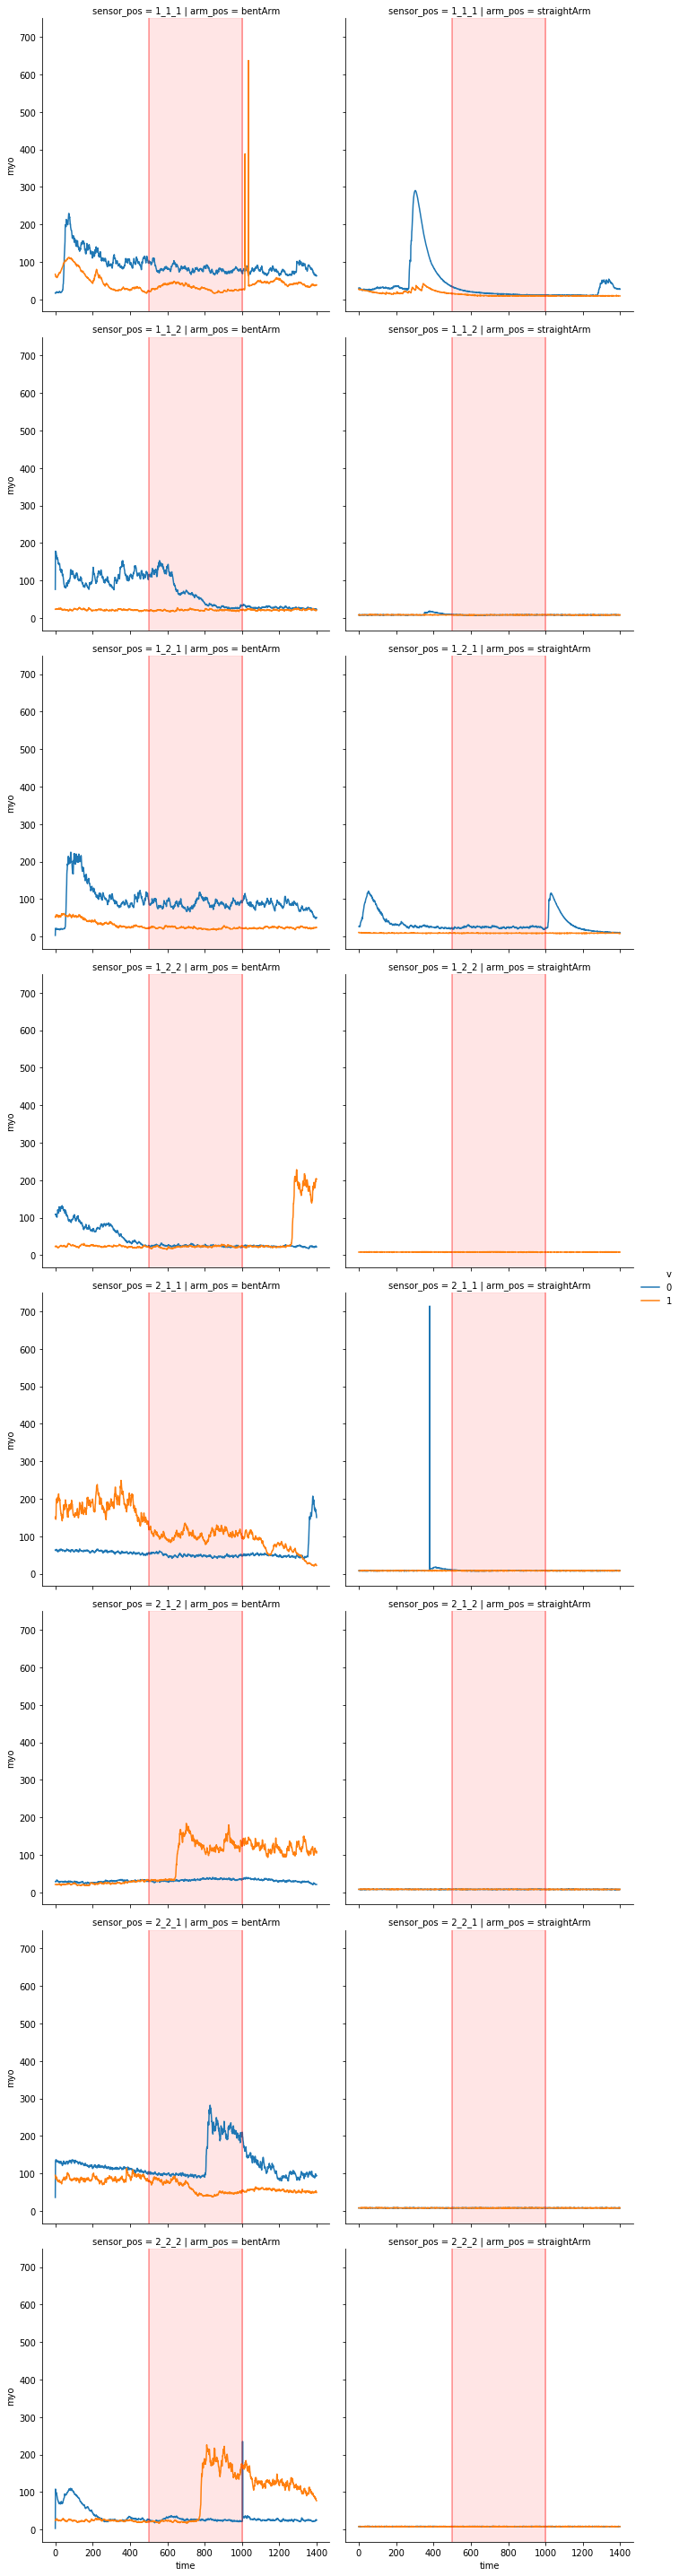

In [6]:
# Plot grid of raw signals
g = sns.relplot(kind="line", data=c, row="sensor_pos", col="arm_pos", x="time", y="myo", hue='v')
# Add flex region
for row in g.axes:
    for graph in row:
        graph.axvline(x=500, color='r', alpha=0.4)
        graph.axvline(x=1000, color='r', alpha=0.4)
        graph.axvspan(xmin=500, xmax=1000, color='r', alpha=0.1)